In [26]:
#Importing libraries required for data manupulation and visualization 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [27]:
#Importing library for warning
import warnings  
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [28]:

df = pd.read_csv("C:/Users/natha/Downloads/archive (15)/AIML Dataset.csv") #Loading data from PC to python

df.head()   #This was done in order to get the information about the columns and rows of the data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [46]:
df.info()     #This was done in order to get the information about the columns and rows of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


# User
yes

In [47]:
df.columns     #This gives the name of the columns in the data

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [43]:
df["isFraud"].value_counts() #This gives out the number of  fraud transaction 

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [44]:
df["isFlaggedFraud"].value_counts() #This displays the number of transactions that are flagged fraud. 

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

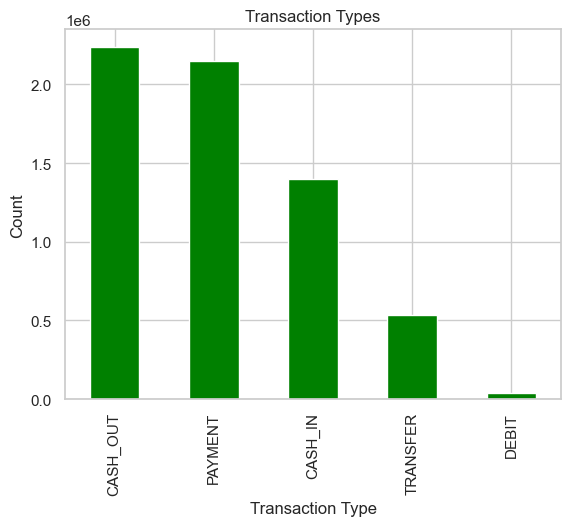

In [93]:
#This is used to plot a bar chart showing diffrent traction types 
df["type"].value_counts().plot(kind = "bar", title = "Transaction Types",color= "green")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

In [60]:
df.isnull() #checks for missing values in the data 

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6362615,False,False,False,False,False,False,False,False,False,False,False
6362616,False,False,False,False,False,False,False,False,False,False,False
6362617,False,False,False,False,False,False,False,False,False,False,False
6362618,False,False,False,False,False,False,False,False,False,False,False


In [75]:
df.shape  # This is done to check the size of the data

(6362620, 11)

In [102]:
PF = df["isFraud"].value_counts()[1]/df.shape[0]*100  #Percentage of fraud

In [101]:
PF = round(PF,2)   #round up the percenage fraud to  two decimal places

In [112]:
PF

np.float64(0.12908204481801522)

<function matplotlib.pyplot.show(close=None, block=None)>

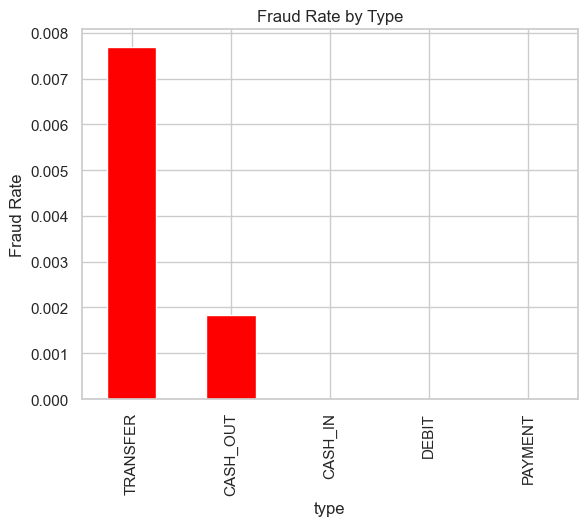

In [113]:
#Ploting a graph to show fraud rate by type and sorting according to descending order i.e highest fraud rate first
fraud_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending = False)
fraud_by_type.plot(kind = "bar", title = "Fraud Rate by Type", color= "red")
plt.ylabel("Fraud Rate")
plt.show

In [114]:
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

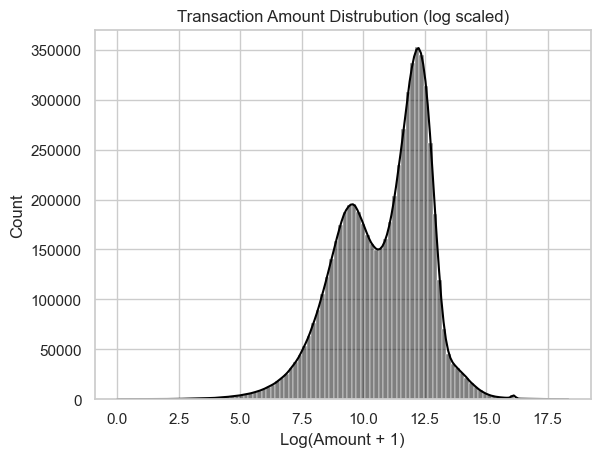

In [115]:
sns.histplot(np.log1p(df["amount"]), bins=100, kde= True, color = "black")
plt.title("Transaction Amount Distrubution (log scaled)")
plt.xlabel("Log(Amount + 1)")
plt.show()